## Machine Learning Review Exercise 4 (ML_SP22_RE_4) 
### Due Date: 03/25 before Mid-night
### Linear Regression, One-hot encoding and K-fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This review exercise is on building a Linear Regression model, practice k-fold cross validation and one-hot encoding 

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [3]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

***Type your code here***

In [7]:
# show your code here
df = housing
df.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


***Income has the highest correction with Price***

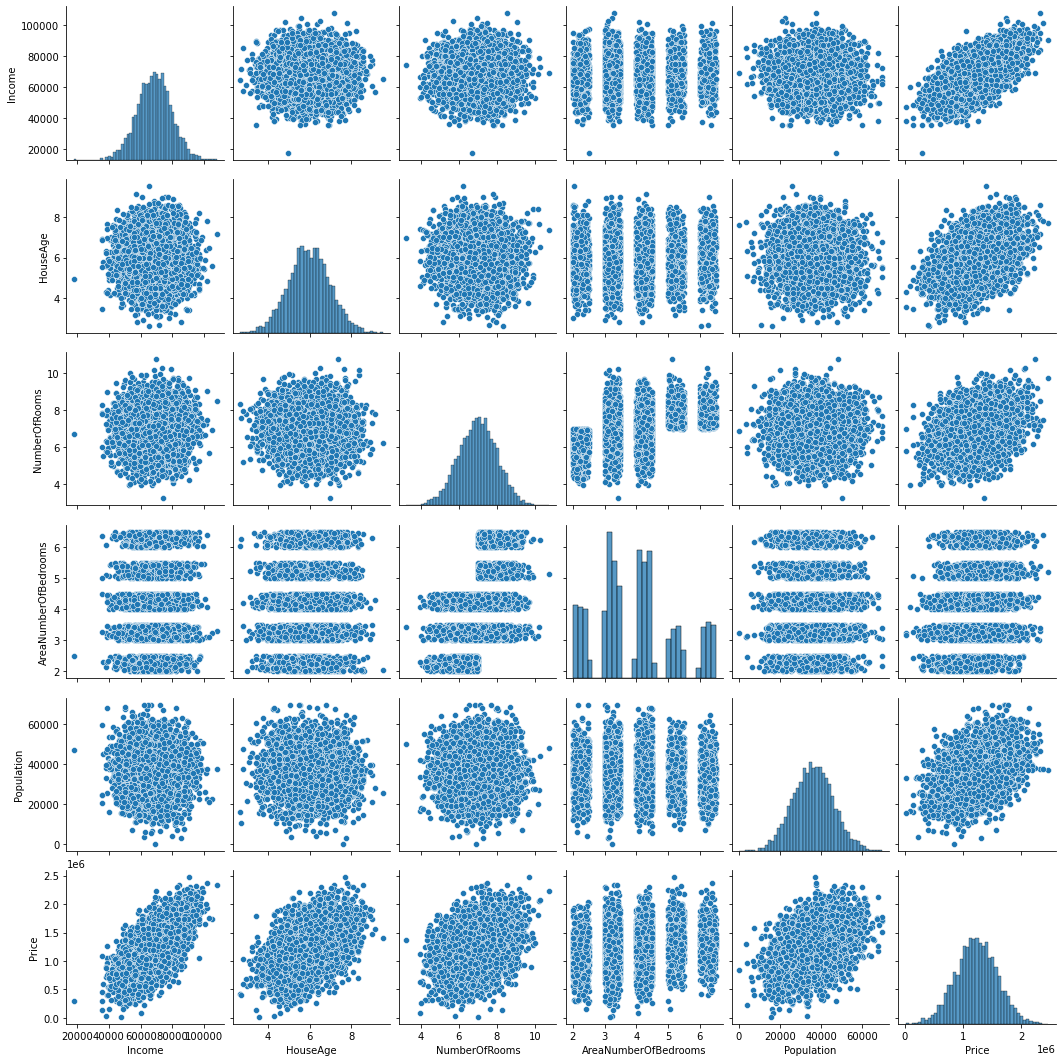

In [8]:
sns.pairplot(df)

In [11]:
# Build a one-factor model with Income as independent varable
X = df['Income'].values.reshape(-1, 1)
Y = df['Price'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =0)
model1 = LinearRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-square:', metrics.r2_score(Y_test, Y_pred))

MSE: 74084394120.77266
Root MSE: 272184.4854520049
R-square: 0.4006059806785851


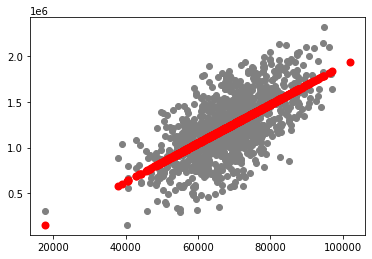

In [13]:
plt.scatter(X_test, Y_test, color = 'gray')
plt.scatter(X_test, Y_pred, color = 'red', linewidth = 2)
plt.show()

***Check 10-fold cross validation***

Trial: 0, R^2: 0.4046463313425388, Slope: [[21.18943753]], Intercept: [-222288.92801981]
Trial: 1, R^2: 0.4189791699559392, Slope: [[21.17272497]], Intercept: [-218760.9963017]
Trial: 2, R^2: 0.41245057283405784, Slope: [[21.12897057]], Intercept: [-215133.59377967]
Trial: 3, R^2: 0.3699313664842907, Slope: [[21.27960173]], Intercept: [-226160.93189012]
Trial: 4, R^2: 0.4076720398571797, Slope: [[21.30479549]], Intercept: [-232461.93082549]
Trial: 5, R^2: 0.3711609108588847, Slope: [[21.24004579]], Intercept: [-225892.407276]
Trial: 6, R^2: 0.4055110955031699, Slope: [[21.35793636]], Intercept: [-232315.94509779]
Trial: 7, R^2: 0.42443932773888804, Slope: [[20.99840737]], Intercept: [-208226.56091743]
Trial: 8, R^2: 0.424606946350241, Slope: [[21.03123661]], Intercept: [-206132.27120629]
Trial: 9, R^2: 0.4084840131527724, Slope: [[21.00901438]], Intercept: [-211228.33591284]


<AxesSubplot:xlabel='trial'>

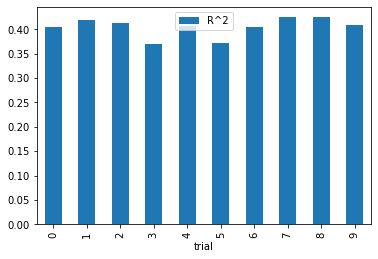

In [15]:
import random

r2 = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = random.randint(1, 1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2_score = metrics.r2_score(Y_test, Y_pred)
    r2.append(r2_score)
    print('Trial: {}, R^2: {}, Slope: {}, Intercept: {}'.format(
        i, r2_score, model.coef_, model.intercept_
    ))

rdf = pd.DataFrame({'trial': range(10), 'R^2':r2})
rdf.plot.bar(x = 'trial', y = 'R^2')

***R-squared are close to each other, so I consider the model passes 10-fold cross validation***

***Pick an additional variable to build a two-factors linear regression model***


In [ ]:
# type your code here
# perform a 10-fold cross validation

***I use HouseAge as the second variable as it has the second highest correlation with the price***

In [16]:
X = housing[['Income', 'HouseAge']].values.reshape(-1, 2)
Y = housing['Price'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
model2 = LinearRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-square:', metrics.r2_score(Y_test, Y_pred))

MSE: 48062437588.67756
Root MSE: 219231.47034282636
R-square: 0.6111416177920193


***R-squared increase from 40% to 61%!!!***

### Now load the Salary data set

In [17]:
# Load the dataset
df = pd.read_csv("Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [18]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [19]:
df.isnull().any() 
# or
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

In [20]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(399, 6)

<AxesSubplot:xlabel='Salary'>

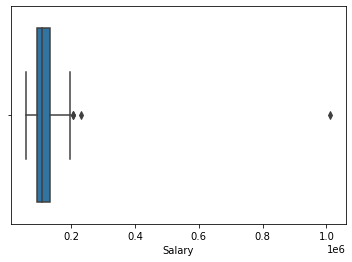

In [21]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

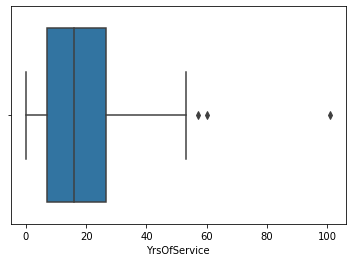

In [22]:
sns.boxplot(x=df['YrsOfService'])

In [23]:
# remove un-reasonable data, 
df = df[df['YrsOfService'] < 70]
df = df[df['Salary'] < 400000]
df.shape

(397, 6)

<AxesSubplot:xlabel='Salary'>

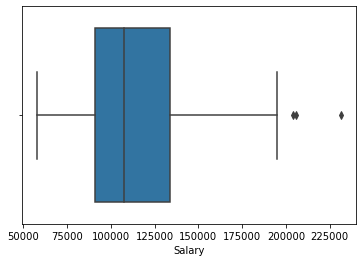

In [24]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

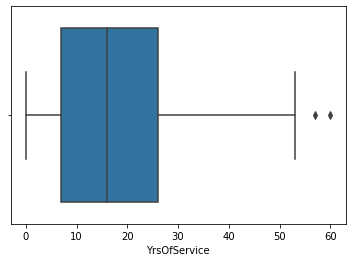

In [25]:
sns.boxplot(x=df['YrsOfService'])

In [26]:
df.shape

(397, 6)

In [27]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


***In general it is a good idea to reset the index after we remove rows***

In [29]:
df = df.reset_index()
df.tail()

,level_0,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,392,398,Prof,A,33.0,30.0,Male,103106
393,393,399,Prof,A,31.0,19.0,Male,150564
394,394,400,Prof,A,42.0,25.0,Male,101738
395,395,401,Prof,A,25.0,15.0,Male,95329
396,396,402,AsstProf,A,8.0,4.0,Male,81035


### Now we are ready to use this data to build model ###

1. Separate numerical features from categorical features
2. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
3. Check if the model pass cross validation
4. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable
to build a second model.
5. Comment on if the model improve or not

***Type your code here***

In [31]:
# ignore longitude and latitude
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']
#categorical_features = ['....']'
categorical_features = ['Rank', 'Discipline', 'Sex']
numerical_df = df[numerical_features]
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [28]:
# ...

In [32]:
categorical_df = df[categorical_features]
categorical_df.head()

,Rank,Discipline,Sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male


In [38]:
X = numerical_df[['YrsSincePhd', 'YrsOfService']].values.reshape(-1,2)
Y = numerical_df['Salary'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
model3 = LinearRegression()
model3.fit(X_train, Y_train)
Y_pred = model3.predict(X_test)
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-square:', metrics.r2_score(Y_test, Y_pred))

MSE: 513424442.69677037
Root MSE: 22658.871169958365
R-square: 0.2114870194393913


***R-square is about 21% with only numerical features***

***Now, test if this model pass the 10-fold cross validation***

<AxesSubplot:xlabel='trial'>

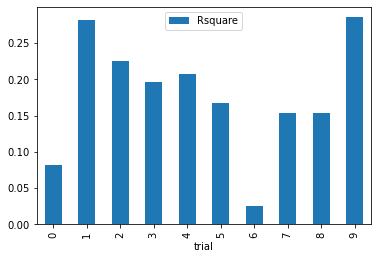

In [37]:
r2 = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': r2})
rdf.plot.bar(x = 'trial', y = 'Rsquare')

***R-square varies a lot, I consider the model does not pass cross validation***

***Now, try to include categorical variables***

In [46]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_data = onehot_encoder.fit_transform(categorical_df)
onehot_data.toarray()

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [47]:
onehot_encoder.categories_

[array(['AssocProf', 'AsstProf', 'Prof'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [48]:
column_names = np.concatenate(onehot_encoder.categories_)
column_names

array(['AssocProf', 'AsstProf', 'Prof', 'A', 'B', 'Female', 'Male'],
      dtype=object)

In [50]:
onehot_df = pd.DataFrame(onehot_data.toarray(), columns = column_names)
onehot_df.head()

,AssocProf,AsstProf,Prof,A,B,Female,Male
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [54]:
combine_df = pd.concat([numerical_df, onehot_df],axis=1)
combine_df

,YrsSincePhd,YrsOfService,Salary,AssocProf,AsstProf,Prof,A,B,Female,Male
0,19.0,18.0,139750,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,20.0,16.0,173200,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,4.0,3.0,79750,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,45.0,39.0,115000,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,40.0,41.0,141500,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
392,33.0,30.0,103106,0.0,0.0,1.0,1.0,0.0,0.0,1.0
393,31.0,19.0,150564,0.0,0.0,1.0,1.0,0.0,0.0,1.0
394,42.0,25.0,101738,0.0,0.0,1.0,1.0,0.0,0.0,1.0
395,25.0,15.0,95329,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(combine_df.drop('Salary',axis=1), 
                                                    combine_df['Salary'], 
                                                    test_size=0.20, 
                                                    random_state=101)
model4 = LinearRegression()
model4.fit(X_train, Y_train)
Y_pred = model4.predict(X_test)
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-square:', metrics.r2_score(Y_test, Y_pred))

MSE: 631444200.0112755
Root MSE: 25128.553480279672
R-square: 0.37130721249015197


***The model R-squared has improved quite a bit from 21% to 37%***

<AxesSubplot:xlabel='trial'>

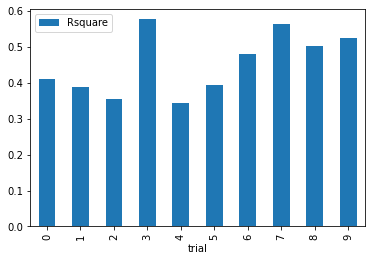

In [56]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(combine_df.drop('Salary',axis=1), 
                                                    combine_df['Salary'], 
                                                    test_size=0.20, 
                                                    random_state=random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

***R-square varies a lot less than before. I consider the model passes cross validation after we add the categorical variables***